In [ ]:
from io import BytesIO

import cv2
import IPython.display as Disp
import numpy as np
import pytesseract
import requests
from IPython.display import display
from PIL import Image

In [10]:
pytesseract.pytesseract.tesseract_cmd = r"c:\Program Files\Tesseract-OCR\tesseract.exe"

image_url = "https://www.epaveldas.lt/static/lnb-bucket/C1B0003883315/C1B0003883315-1931-Nr.3/original/0001-DEDFD254B35C4827E54960451EC6EFFB.jpg"
response = requests.get(image_url)
image = Image.open(BytesIO(response.content))

# Convert the image to grayscale
image = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)

# Optional: Apply thresholding to improve OCR results
_, thresh = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

# OCR with configuration to recognize two-column text
custom_config = r"--oem 3 --psm 6"
text = pytesseract.image_to_string(thresh, config=custom_config, lang="lit")

print(text)

h 4 .
Policijos Zinios
LEIDŽĖA*KRIMINALINĖS POLICIJOS VALDYBA, KAUNAS, MISKŲ G-VE 13. TEL. 521 IR 26-95
Al aieiai ||| Naunas, 1031 m. vasario mėn. 151. | 3 05 m.
š "o B ž I.
JA P 1 Iešk D
M eSkomMmi asmenys, .

1. Adomavič us Jonas, Jono sūn:, gim. Polic. II nuov. v-kas r. 4480 nr. 1931.L7.. Kalt. “
1913 m. Vilniaus m. 1930 m. buvo nepilname- 581 str. Baudž. Stat. Suradus nuvaryti Jurbarko
čių nusikaltėlių ir drausmės auklėjimo įstaigoj,  nuov. t. teisėjui į r. 767 nr. 1930. VII. 26. Tas +
iš kurios paleistas 6 mėn. atostogų. Paskutiniu pats ieškomas „K.Z.P.“ 5 nr. 1927 m.
laiku 5 p. pulke buvo auklėtiniu. Žymės: mažas, 6. Bruzgulevičius Adomas, Juozo s., gim. .
vaikiškos išvaizdos, šviesaus veido, kalba aiški, 1894—5 m. Lydos ap., Eišiškių v., Kalesnikų
eisena lėta, serga reumatizmu. Ieško 5 p. D.L. K. km. (Okup. Lietuvoj). Paskutiniu metu gyveno
Kęstučio p. vadas r. 264 nr. 1931. I. 19. Kalt. Kaune, Žemaičių g-vė 13 nr. Be to, gyveno Tra-
pabėgęs auklėtinis su valdiškais rūbais. Sura

In [11]:
display(image)

array([[162, 166, 170, ..., 181, 182, 184],
       [162, 166, 171, ..., 175, 176, 177],
       [164, 168, 172, ..., 178, 179, 180],
       ...,
       [140, 140, 142, ..., 174, 178, 181],
       [135, 141, 149, ..., 182, 183, 184],
       [135, 141, 149, ..., 182, 183, 184]], dtype=uint8)

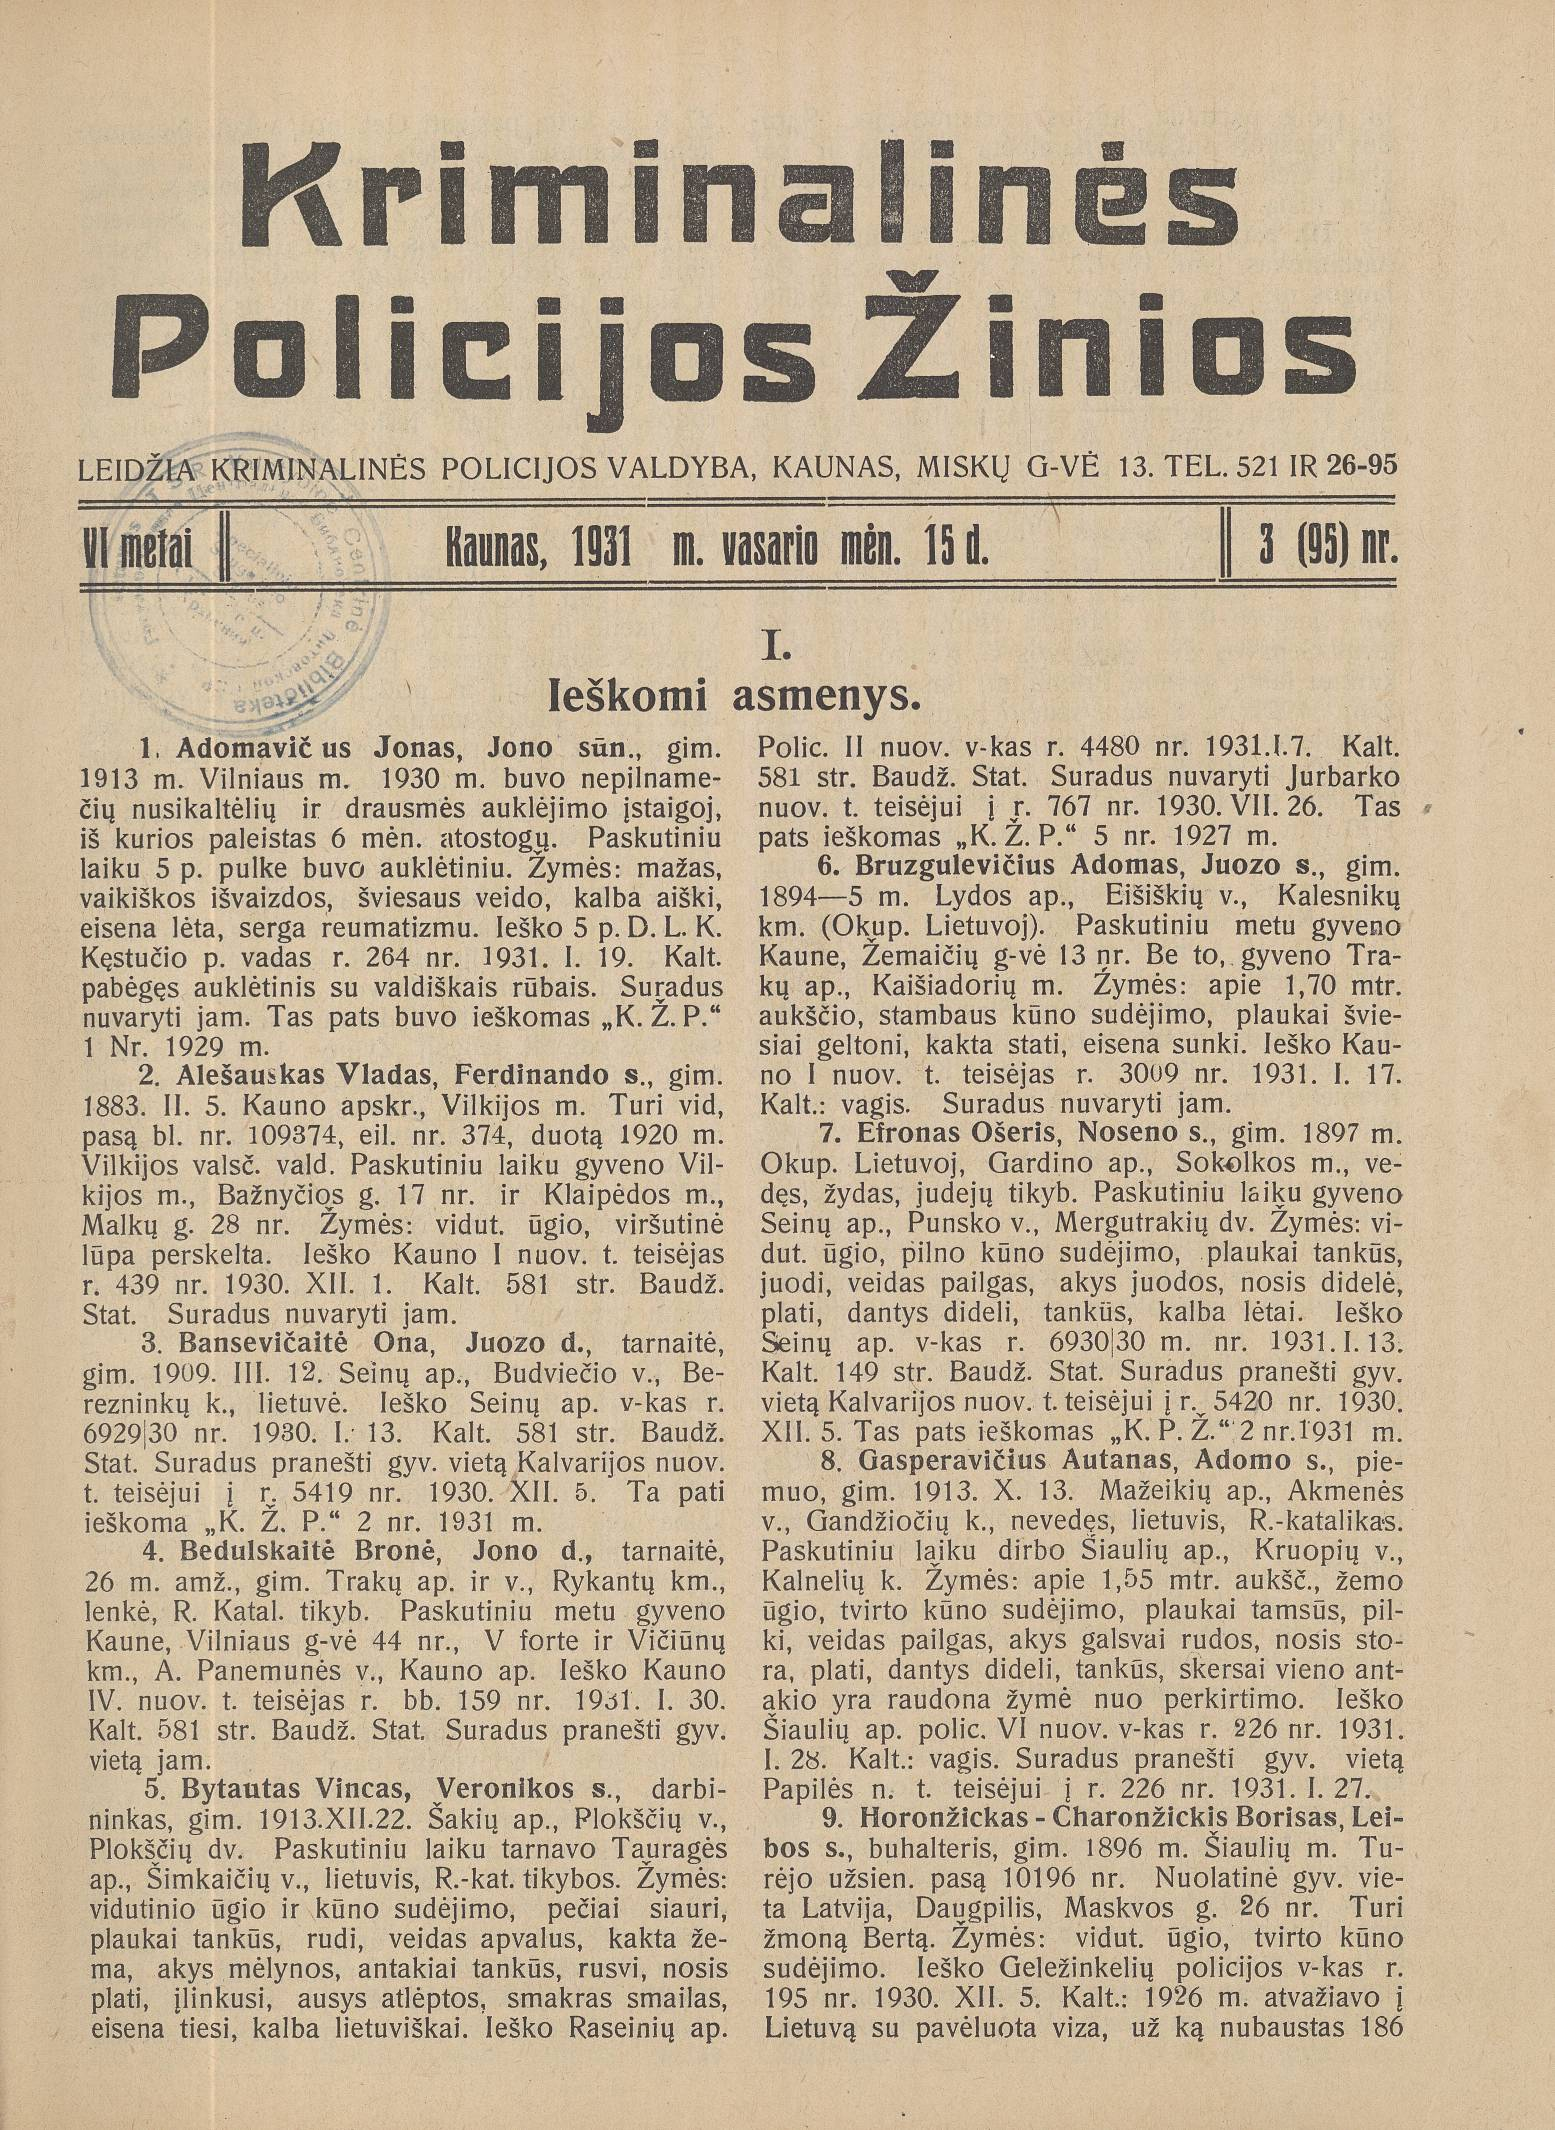

In [12]:
Disp.Image(response.content)